<a href="https://colab.research.google.com/github/jumbokh/nknu-class/blob/main/notebooks/14_%E8%BF%B4%E6%AD%B8%E6%B3%95%E9%A0%90%E6%B8%AC%E5%87%BD%E6%95%B8%EF%BC%88%E6%96%B0%E7%89%88%EF%BC%89.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 14 迴歸法預測函數

我們認真的來做一下數據分析!

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

## 1. 線性迴歸

#### 做一條直線

我們來一條線, 比如說

$$f(x) = 1.2x + 0.8$$

準備好個 50 個點

In [2]:
x = np.linspace(0, 5, 50)

In [3]:
y = 1.2*x + 0.8

畫出圖形來。

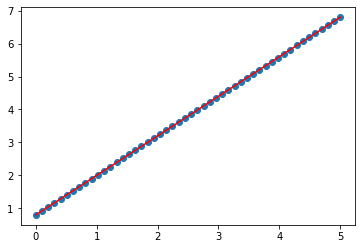

In [4]:
plt.scatter(x,y)
plt.plot(x, 1.2*x+0.8, 'r')

#### 加入 noise 項, 看來更真實

大概的想法就是, 我們真實世界的問題, 化成函數, 我們假設背後有個美好的函數。但相信我們很少看到真實世界的資料那麼漂亮。在統計上, 我們就是假設

$$f(x) + \varepsilon(x)$$

也就是都有個 noise 項。

In [5]:
y = 1.2*x + 0.8 + 0.6*np.random.randn(50)

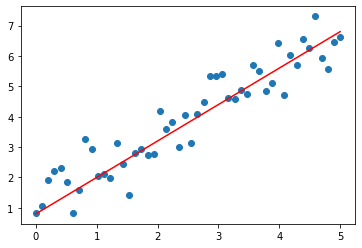

In [6]:
plt.scatter(x,y)
plt.plot(x, 1.2*x + 0.8, 'r')

#### 做線性迴歸找出那條線

做線性迴歸有很多套件, 但我們這裡用 `sklearn` 裡的 `LinearRegression` 來做, 嗯, 線性迴歸。

In [7]:
from sklearn.linear_model import LinearRegression

In [8]:
regr = LinearRegression()

這裡要注意我們本來的 x 是

$$[x_1, x_2, \ldots, x_{50}]$$

但現在要的是

$$[[x_1], [x_2], \ldots, [x_{50}]]$$

這樣的。

In [9]:
X = x.reshape(len(x),1)

In [10]:
regr.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
Y = regr.predict(X)

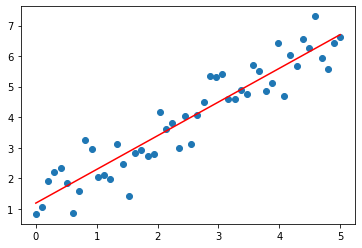

In [12]:
plt.scatter(x, y)
plt.plot(x, Y, 'r')

## 2. 標準函數訓練及測試

#### 分訓練資料、測試資料

一般我們想要看算出來的逼近函數在預測上是不是可靠, 會把一些資料留給「測試」, 就是不讓電腦在計算時「看到」這些測試資料。等函數學成了以後, 再來測試準不準確。這是我們可以用

    sklearn.cross_validation
    
裡的

    train_test_split
    
來亂數選一定百分比的資料來用。

In [13]:
from sklearn.model_selection import train_test_split

把原來的 `x`, `y` 中的 80% 給 training data, 20% 給 testing data。

In [14]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

我們在「訓練」這個函數時只有以下這些資料。

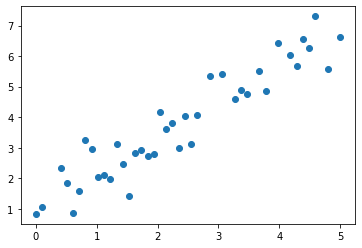

In [15]:
plt.scatter(x_train, y_train)

#### 用訓練資料來 fit 函數

記得現在我們只用 80% 的資料去訓練。

In [16]:
regr = LinearRegression()
X_train = x_train.reshape(len(x_train),1)
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
Y_train = regr.predict(X_train)

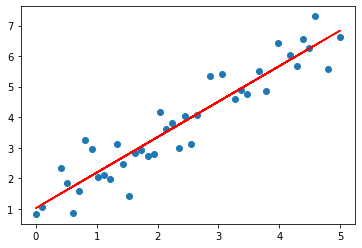

In [18]:
plt.scatter(x_train, y_train)
plt.plot(x_train, Y_train, 'r')

#### 用測試資料試試我們預測準不準

In [19]:
X_test = x_test.reshape(len(x_test),1)

In [20]:
Y_test = regr.predict(X_test)

In [21]:
mse = np.sum((Y_test-y_test)**2) / len(y_test)

In [22]:
mse

0.39314724188771455

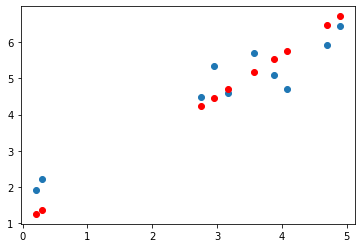

In [23]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, Y_test, c='r')

## 3. 不是線性的目標函數

這裡我們用個非線性的函數來生假數據:

$$f(x) = \sin(3.2x) + 0.8x$$

一樣準備加上一些 noise。

### 3. 生成假資料

In [24]:
x = np.linspace(0, 5, 50)
y = np.sin(3.2*x) + 0.8*x + 0.3*np.random.randn(50)

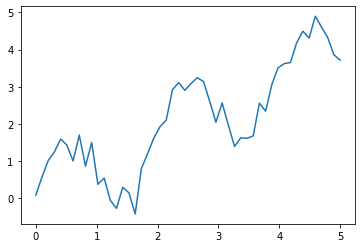

In [25]:
plt.plot(x, y)

#### 標準線性學

In [26]:
regr_lin = LinearRegression()

In [27]:
X = x.reshape(len(x), 1)

In [28]:
regr_lin.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

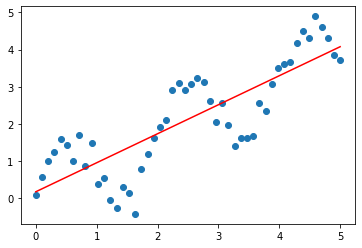

In [29]:
plt.scatter(x,y)
plt.plot(x, regr_lin.predict(X), 'r')

果然超級不準, 該如何是好?

#### 多項式

我們來用 6 次多項式學

In [30]:
X_poly = np.array([[k, k**2, k**3, k**4, k**5, k**6] for k in x])

In [31]:
regr_poly = LinearRegression()

In [32]:
regr_poly.fit(X_poly, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

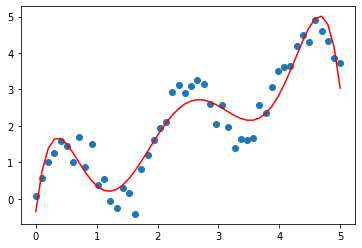

In [33]:
plt.scatter(x,y)
plt.plot(x, regr_poly.predict(X_poly), 'r')

#### 用 RBF!!

$$\phi_i = e^{-\| x - c_i \|^2/2\sigma^2}$$

In [34]:
def RBF(x, center, sigma):
    k = np.exp(-(x - center)**2/(2*sigma**2))
    return k

In [35]:
sigma = 0.3

In [36]:
X_rbf = np.array([[RBF(k, 0.5, sigma), 
                  RBF(k, 1.5, sigma),
                  RBF(k, 2.5, sigma),
                  RBF(k, 3.5, sigma),
                  RBF(k, 4.5, sigma)] for k in x])

In [37]:
regr_rbf = LinearRegression()

In [38]:
regr_rbf.fit(X_rbf, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

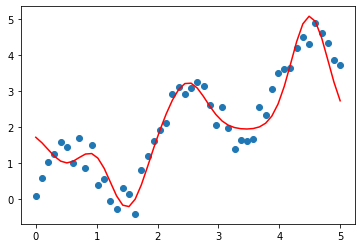

In [39]:
plt.scatter(x,y)
plt.plot(x, regr_rbf.predict(X_rbf), 'r')

#### 三種一起比較

In [40]:
Y_lin = regr_lin.predict(X)
Y_poly = regr_poly.predict(X_poly)
Y_rbf = regr_rbf.predict(X_rbf)

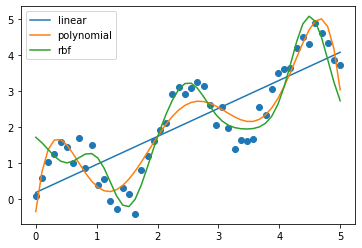

In [41]:
plt.scatter(x,y)

plt.plot(x, Y_lin, label='linear')
plt.plot(x, Y_poly, label='polynomial')
plt.plot(x, Y_rbf, label='rbf')
plt.legend()